In [11]:
import pandas as pd
import numpy as np
import functools as ft

# Task 1

In [6]:
## Clear Night
clear_night_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_ctl.csv")
clear_night_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_cvip.csv")
clear_night_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_traj.csv")

## Clear Sunset
clear_sunset_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_ctl.csv")
clear_sunset_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_cvip.csv")
clear_sunset_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_traj.csv")

## Clear Noon
clear_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_ctl.csv")
clear_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_cvip.csv")
clear_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_traj.csv")

## Rain Noon
rain_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_ctl.csv")
rain_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_cvip.csv")
rain_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_traj.csv")

In [34]:
## First 5 rows of clear-night condition

print(clear_night_ctl.head(5),'\n')
print(clear_night_cvip.head(5),'\n')
print(clear_night_traj.head(5))

      ts  agent_id  throttle     steer  brake
0  34097         0       0.9 -0.013192    0.0
1  34098         0       0.9 -0.003670    0.0
2  34099         0       0.9 -0.004190    0.0
3  34100         0       0.9 -0.003286    0.0
4  34101         0       0.9  0.000093    0.0 

      ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  34097         0  500.491189  198.767441 -95.832657 -499.819366
1  34098         0    5.595580  195.567444 -90.832657    0.100000
2  34099         0    5.592365  195.567444 -90.832657    0.095407
3  34100         0    5.589578  195.567444 -90.832657    0.084691
4  34101         0    5.587154  195.567444 -90.832657    0.069311 

      ts  agent_id           x         y         z    v
0  34097         0  192.362411 -86.26268  0.539326  0.0
1  34098         0  192.362411 -86.26268  0.491906  0.0
2  34099         0  192.362411 -86.26268  0.438374  0.0
3  34100         0  192.362411 -86.26268  0.378732  0.0
4  34101         0  192.362411 -86.26268  0.

In [19]:
## Clear Night Summarization

clear_night_dfs = [clear_night_ctl,clear_night_cvip,clear_night_traj]
clear_night = ft.reduce(lambda left, right: pd.merge(left, right, on=['ts','agent_id']), clear_night_dfs)
clear_night = clear_night.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_night.head()

,ts,agent_id,throttle,steer,brake,cvip,x,y,v
0,34097,0,0.9,-0.013192,0.0,500.491189,192.362411,-86.26268,0.0
1,34098,0,0.9,-0.003670,0.0,5.595580,192.362411,-86.26268,0.0
2,34099,0,0.9,-0.004190,0.0,5.592365,192.362411,-86.26268,0.0
3,34100,0,0.9,-0.003286,0.0,5.589578,192.362411,-86.26268,0.0
4,34101,0,0.9,0.000093,0.0,5.587154,192.362411,-86.26268,0.0


In [38]:
## Duration

clear_night_duration = clear_night['ts'][clear_night.shape[0]-1] - clear_night['ts'][0]
print(clear_night['ts'][0],clear_night['ts'][clear_night.shape[0]-1])
print(clear_night_duration," milliseonds")

34097 34936
839  milliseonds


In [32]:
## Mean and Standard Dev

print(clear_night.drop(['ts','agent_id'],axis=1).mean(axis=0),'\n')
print(clear_night.drop(['ts','agent_id'],axis=1).std(axis=0))

throttle      0.633596
steer         0.003531
brake         0.115476
cvip         32.742418
x           191.314683
y           -32.234818
v             6.216075
dtype: float64 

throttle     0.345303
steer        0.048470
brake        0.319786
cvip        32.175866
x            1.171030
y           39.092016
v            2.883256
dtype: float64


In [39]:
## Clear Sunset Compilation, Duration

clear_sunset_dfs = [clear_sunset_ctl,clear_sunset_cvip,clear_sunset_traj]
clear_sunset = ft.reduce(lambda left, right: pd.merge(left, right, on=['ts','agent_id']), clear_sunset_dfs)
clear_sunset = clear_sunset.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)

clear_sunset_duration = clear_sunset['ts'][clear_sunset.shape[0]-1] - clear_sunset['ts'][0]
print(clear_sunset['ts'][0],clear_sunset['ts'][clear_sunset.shape[0]-1])
print(clear_sunset_duration," milliseonds")

27578 28335
757  milliseonds


In [40]:
## Clear Noon Compilation, Duration

clear_noon_dfs = [clear_noon_ctl,clear_noon_cvip,clear_noon_traj]
clear_noon = ft.reduce(lambda left, right: pd.merge(left, right, on=['ts','agent_id']), clear_noon_dfs)
clear_noon = clear_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)

clear_noon_duration = clear_noon['ts'][clear_noon.shape[0]-1] - clear_noon['ts'][0]
print(clear_noon['ts'][0],clear_noon['ts'][clear_noon.shape[0]-1])
print(clear_noon_duration," milliseonds")

16797 17548
751  milliseonds


In [41]:
## Rainy Noon Compilation, Duration

rain_noon_dfs = [rain_noon_ctl,rain_noon_cvip,rain_noon_traj]
rain_noon = ft.reduce(lambda left, right: pd.merge(left, right, on=['ts','agent_id']), rain_noon_dfs)
rain_noon = rain_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)

rain_noon_duration = rain_noon['ts'][rain_noon.shape[0]-1] - rain_noon['ts'][0]
print(rain_noon['ts'][0],rain_noon['ts'][rain_noon.shape[0]-1])
print(rain_noon_duration," milliseonds")

25803 26204
401  milliseonds


In [50]:
## Mean and STD Calculations -- Combined

means_dict = {
    "Clear Night":clear_night.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Clear Sunset":clear_sunset.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Clear Noon":clear_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Rain Noon":rain_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
}
means = pd.DataFrame(means_dict)

std_dict = {
    "Clear Night":clear_night.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Clear Sunset":clear_sunset.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Clear Noon":clear_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Rain Noon":rain_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
}
stds = pd.DataFrame(std_dict)

In [51]:
## Means Table
means

,Clear Night,Clear Sunset,Clear Noon,Rain Noon
throttle,0.634,0.611,0.610,0.644
steer,0.004,0.000,0.001,-0.000
brake,0.115,0.057,0.061,0.047
cvip,32.742,20.123,19.467,7.058
x,191.315,192.946,192.920,192.631
y,-32.235,-31.141,-31.420,-63.874
v,6.216,6.884,6.929,6.342


In [52]:
## STD Table
stds

,Clear Night,Clear Sunset,Clear Noon,Rain Noon
throttle,0.345,0.281,0.282,0.272
steer,0.048,0.005,0.005,0.003
brake,0.320,0.231,0.240,0.212
cvip,32.176,24.672,24.243,24.704
x,1.171,0.401,0.404,0.254
y,39.092,40.450,40.510,21.144
v,2.883,3.314,3.285,3.864


In [53]:
import matplotlib.pyplot as plt

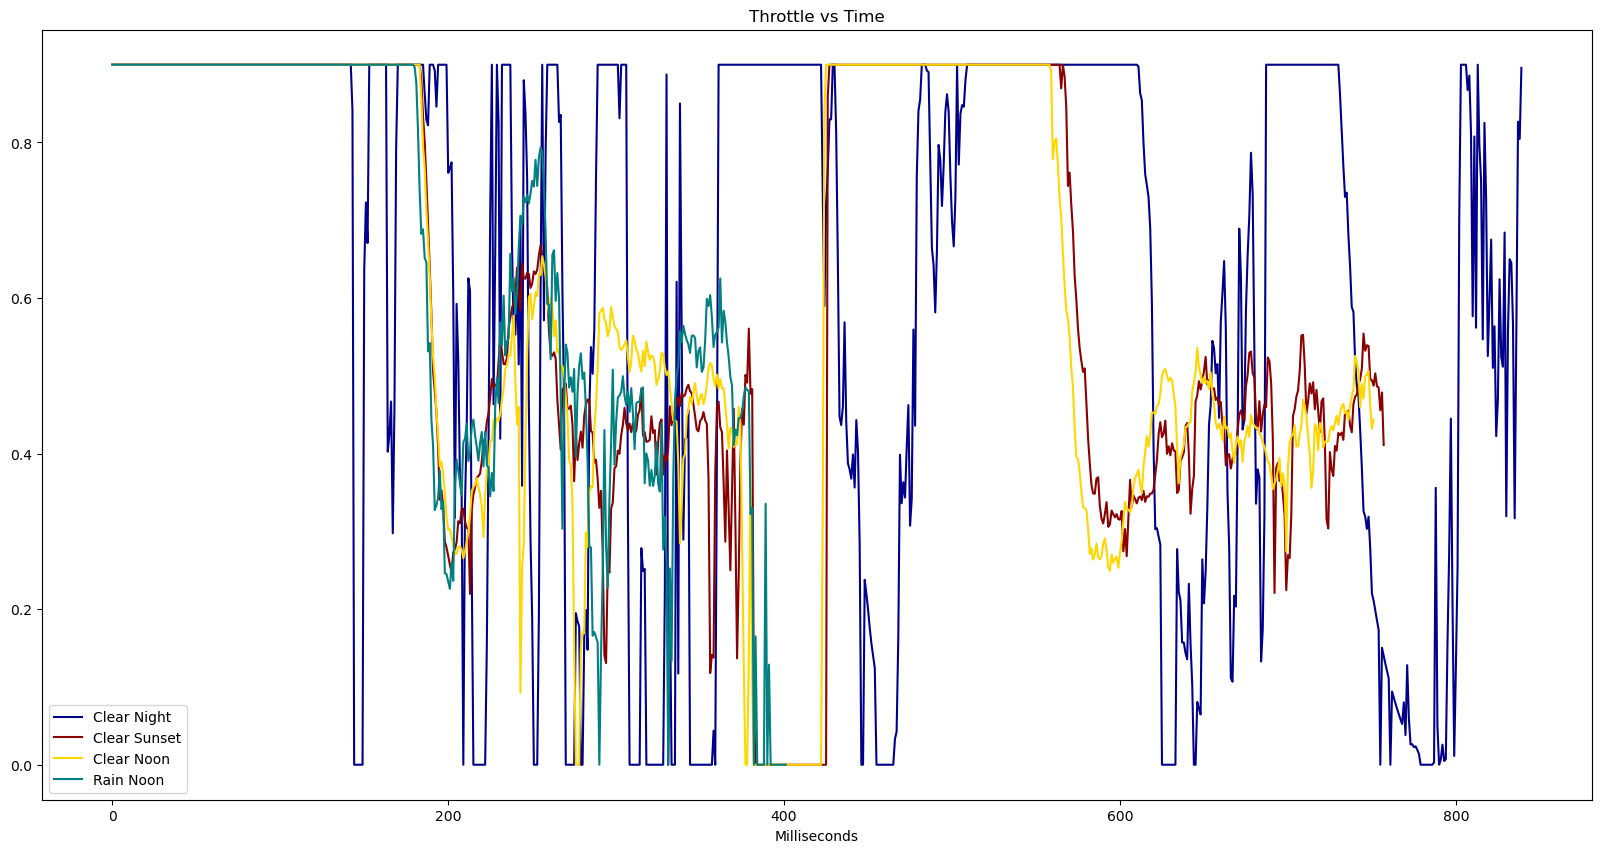

In [74]:
## Visualizing Results
time = np.arange(0,1000,1)

## Throttle vs Time
plt.figure(figsize=(20,10))

plt.title("Throttle vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['throttle'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['throttle'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['throttle'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['throttle'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

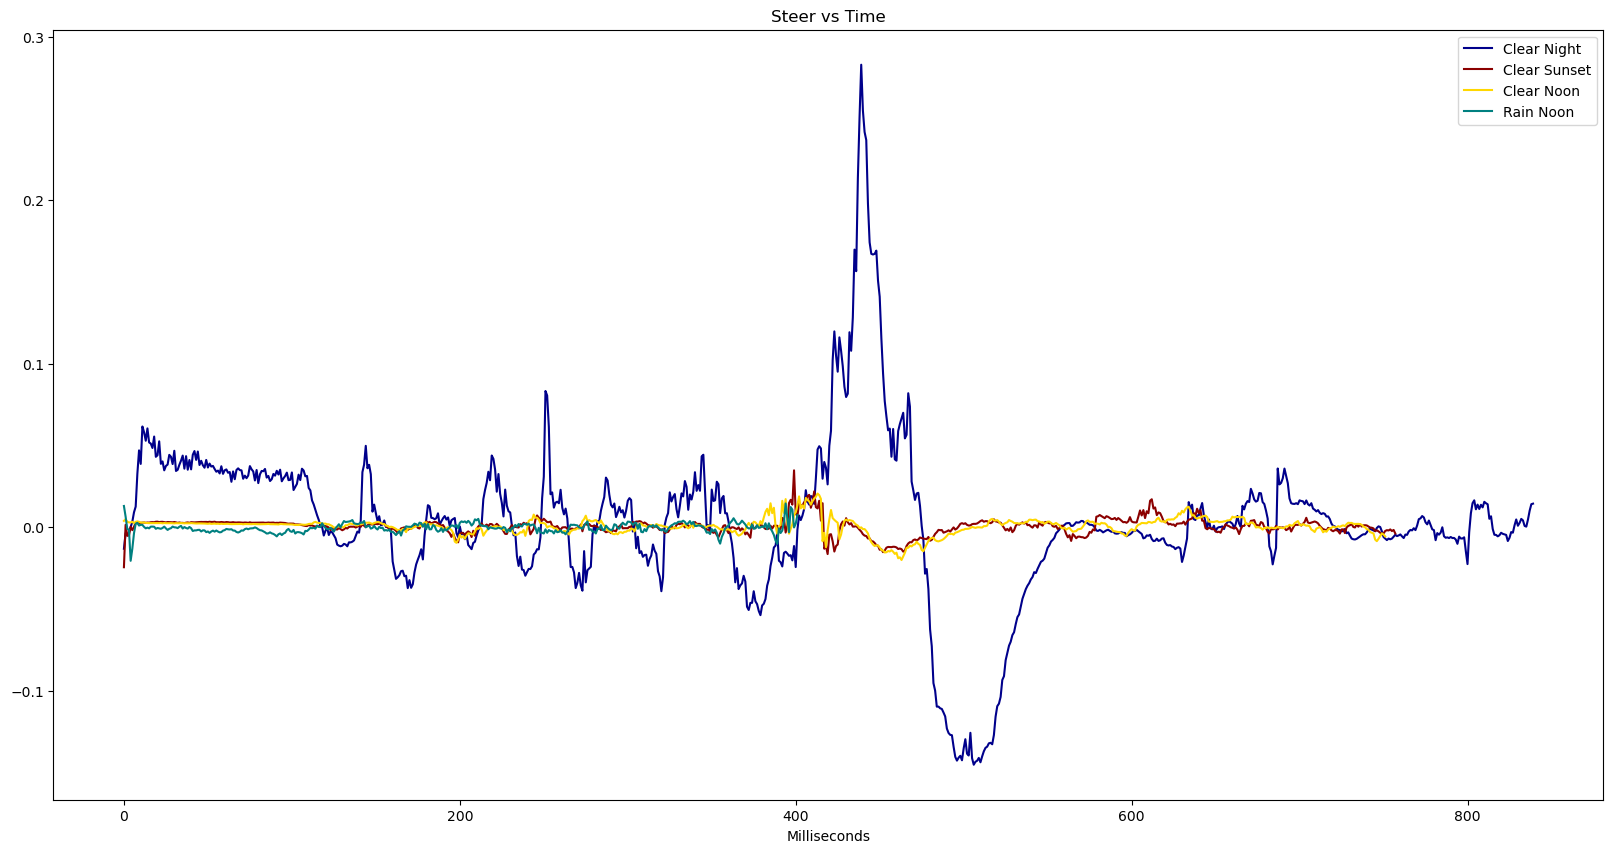

In [75]:
## Steer vs Time
plt.figure(figsize=(20,10))

plt.title("Steer vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['steer'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['steer'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['steer'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['steer'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

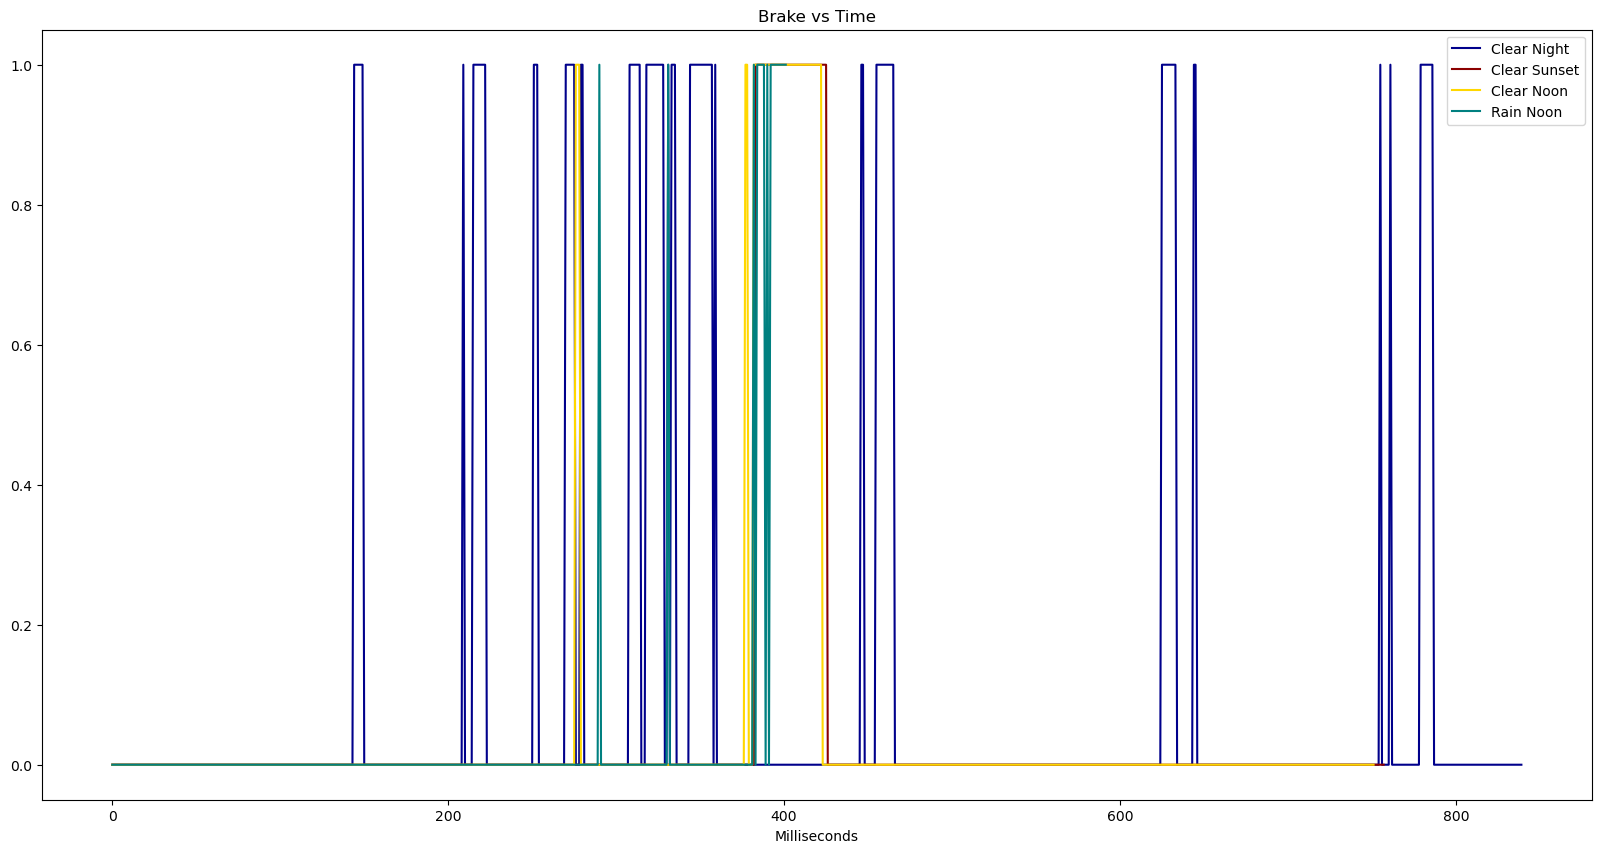

In [76]:
## Brake vs Time
plt.figure(figsize=(20,10))

plt.title("Brake vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['brake'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['brake'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['brake'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['brake'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

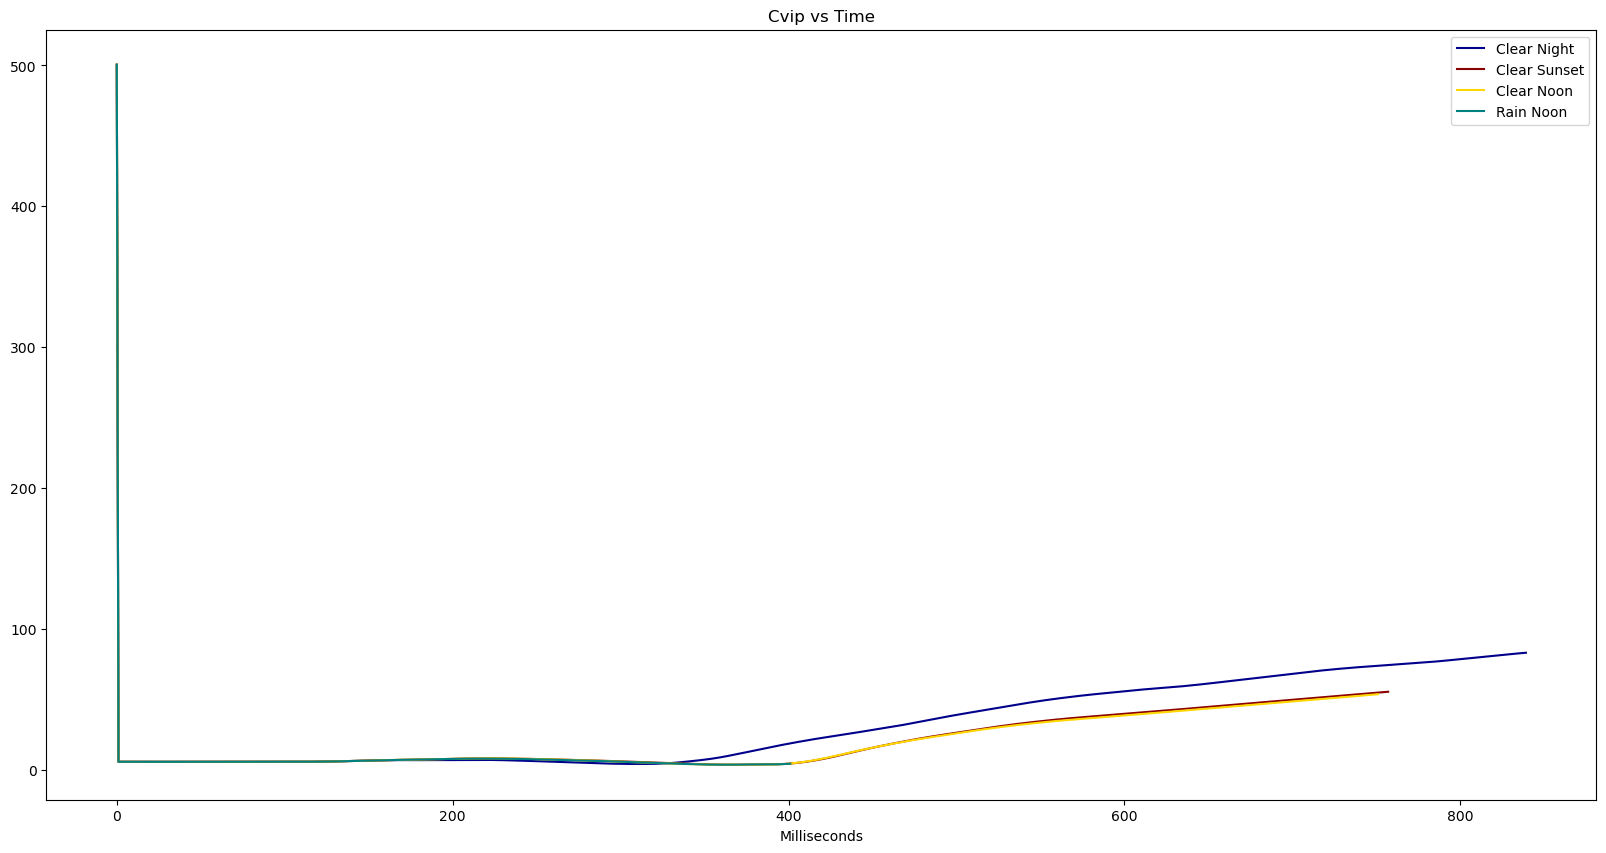

In [78]:
## Cvip vs Time
plt.figure(figsize=(20,10))

plt.title("Cvip vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['cvip'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['cvip'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['cvip'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['cvip'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

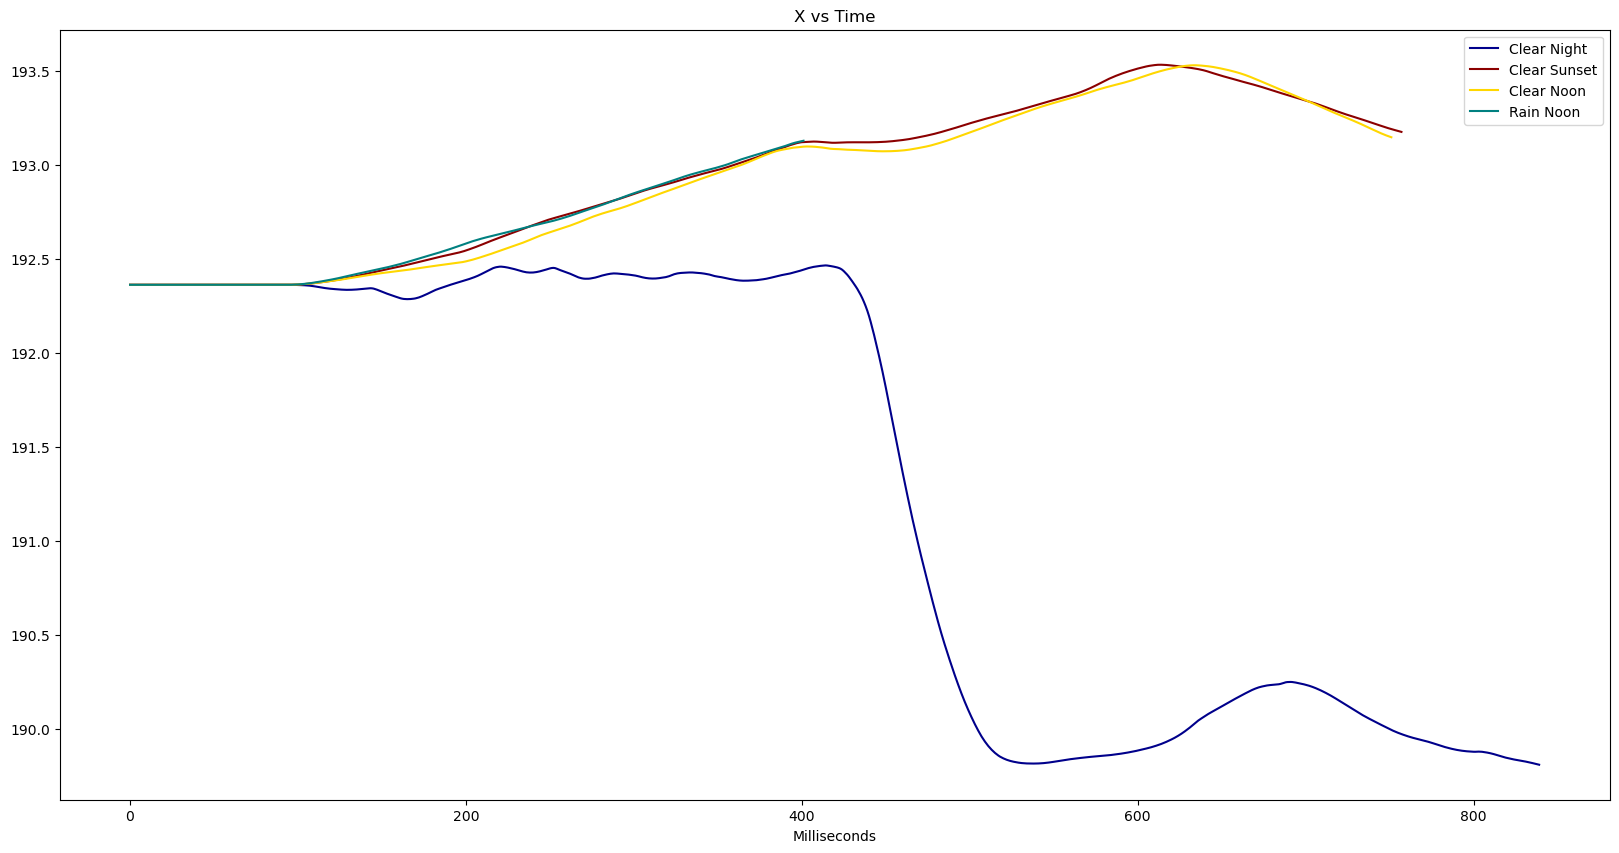

In [79]:
## X vs Time
plt.figure(figsize=(20,10))

plt.title("X vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['x'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['x'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['x'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['x'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

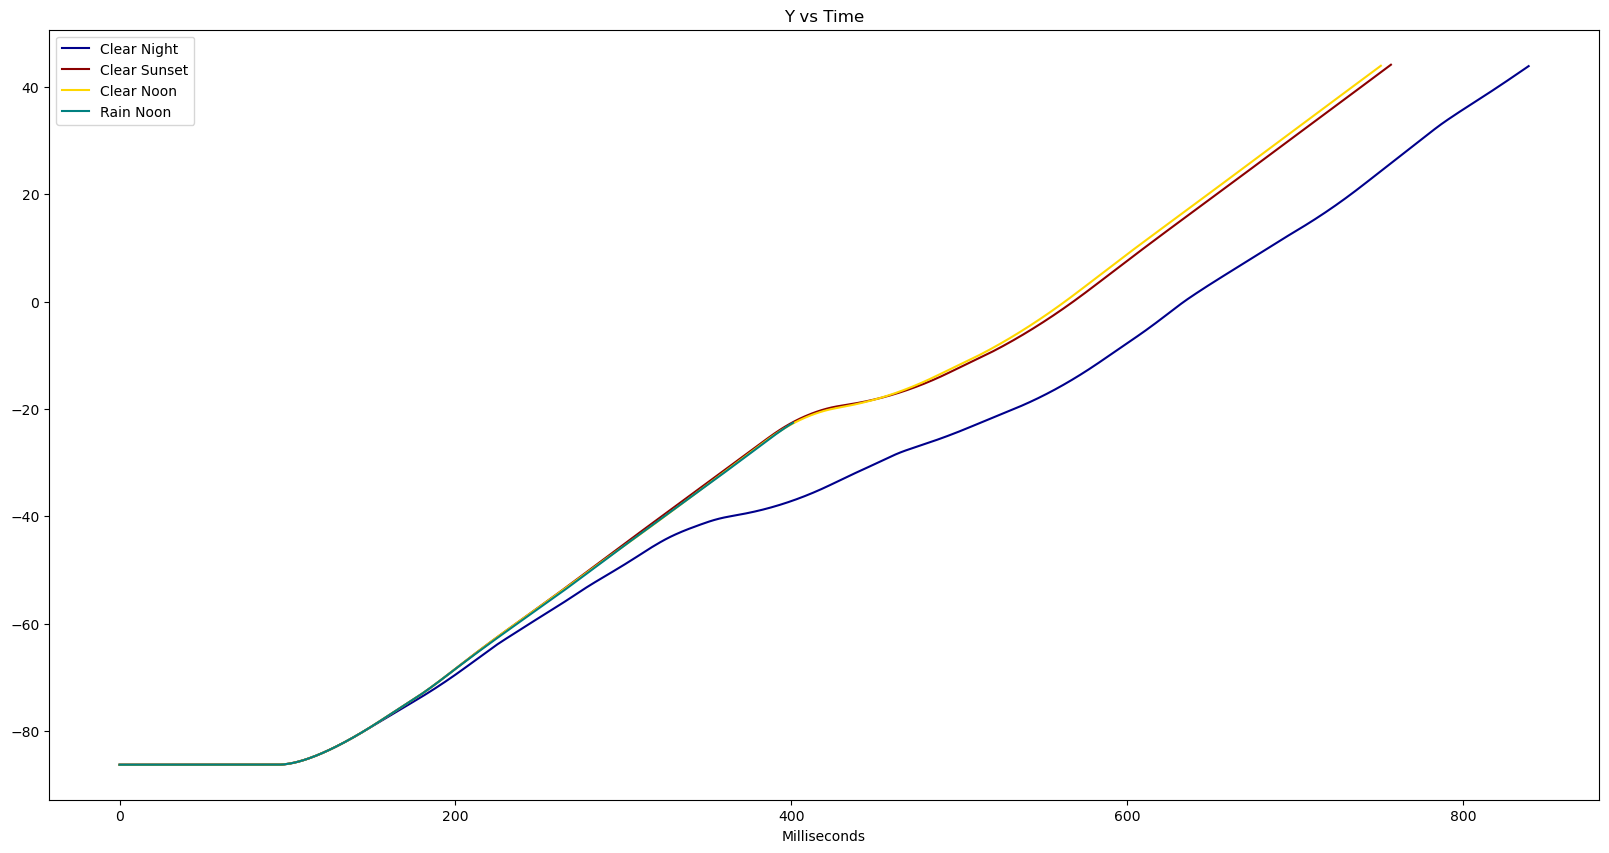

In [80]:
## Y vs Time
plt.figure(figsize=(20,10))

plt.title("Y vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['y'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['y'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['y'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['y'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

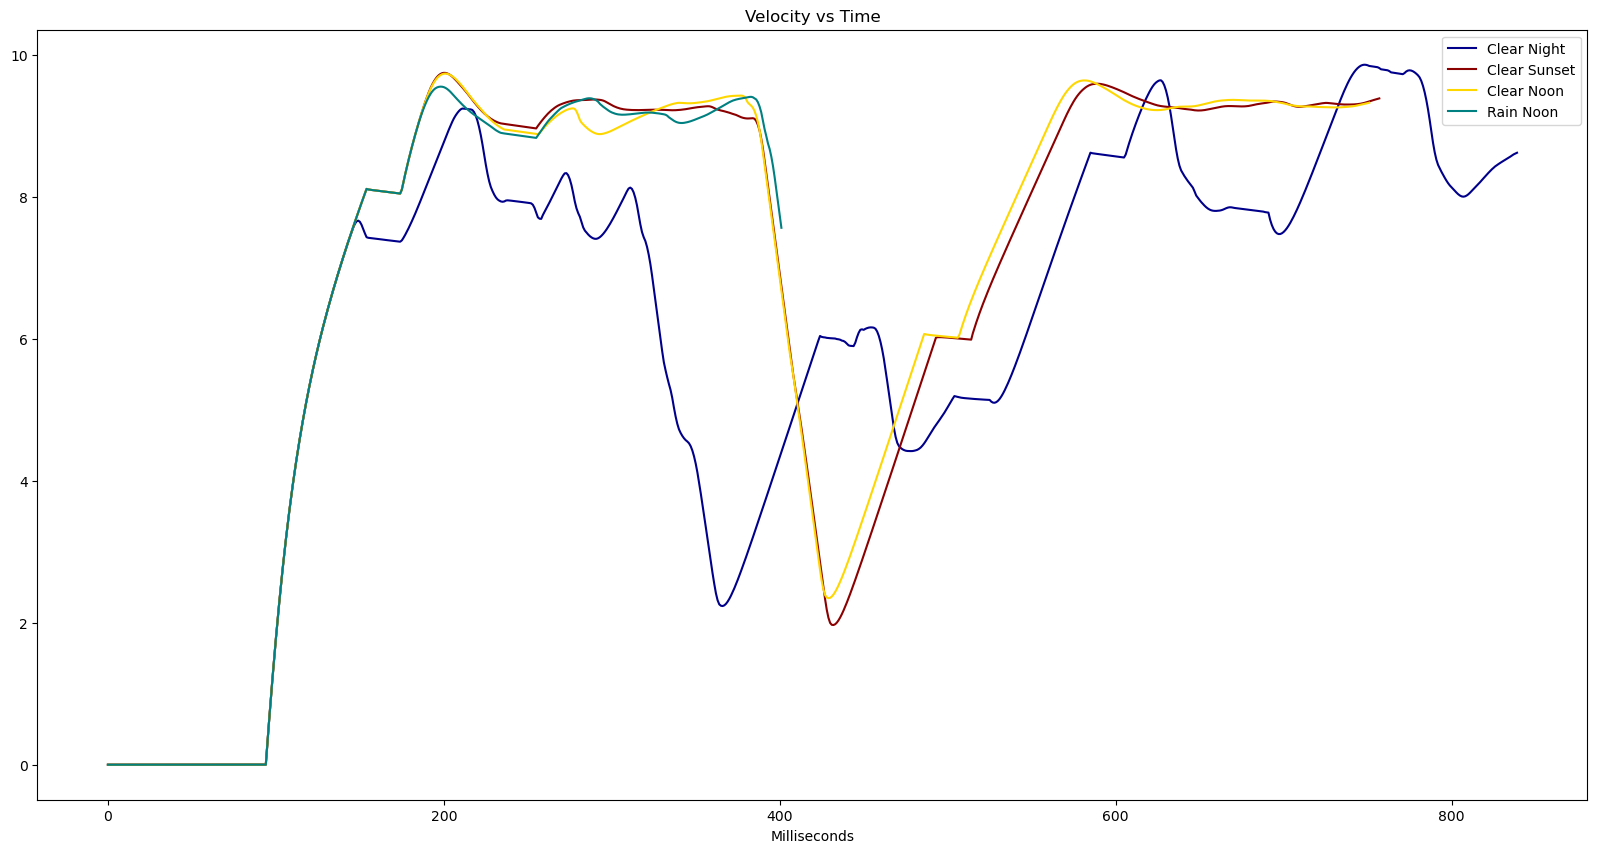

In [81]:
## Velocity vs Time
plt.figure(figsize=(20,10))

plt.title("Velocity vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['v'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['v'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['v'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['v'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

#### Experience / Intuition: How should crashing affect car motion?
- throttle: would expect to be negative, as velocity slows
- velocity: would expect to drop
- steer: direction may or may not change
- brake: may or may not change dependning on the abruptness of the crash. Woudl expect a slight change in general
- x, y, cvip: would be hard to compare against non accident data


Based on the throttle, steering, and x-change of the car in the clear night scenario, I would predict a crash in that condition.

# Task 2